<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/cours2025/WienerFilter_transitoires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from  scipy import signal

In [2]:
rng = np.random.default_rng()

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 16

In [88]:
def h0(x):
  return 10*np.sin(4*np.pi*x+0.8*np.pi)
def h1(x):
  return 5*np.exp(2*x)-100
def f0(x):
 return np.piecewise(x,
                     [x<=0.2,
                      (0.2<x) & (x<=0.4),
                     (0.4<x) & (x<=1.1),
                     (1.1<x) & (x<=1.4),
                      (1.4<x) & (x<= 1.5),
                      (1.5<x) & (x<=1.8),
                     x>=1.8],
                     [0.,
                      -30.,
                      lambda x:h0(x),
                      lambda x:h1(x),
                      lambda x:h1(x)+30,
                      lambda x:h1(x),
                      0.
                     ])


def f(x):
  return -f0(2*x)/10.

In [229]:
Ns = 2**10

In [230]:
time =np.arange(0., 1.0, 1./Ns)
y = f(time)

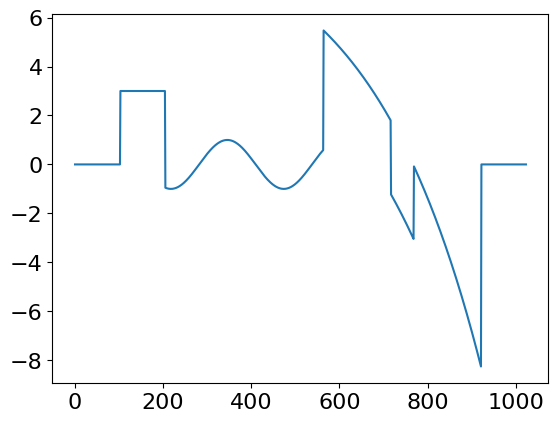

In [232]:
plt.plot(y)

In [254]:
noise_power = 0.05 * Ns / 2
sigma_corrupt = 0.3*np.sqrt(noise_power)
noise = rng.normal(scale=sigma_corrupt, size=time.shape)   # noise corruption

In [255]:
y_noisy = y+ noise  # noisy signal

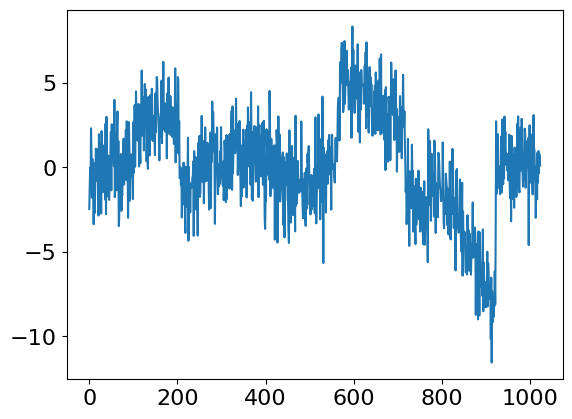

In [256]:
plt.plot(y_noisy)

In [257]:
freqs, Pyy = signal.csd(y, y, nperseg=Ns)               # power spectrum of the gaussian
freqs, Pnn = signal.csd(noise, noise, nperseg=Ns)       # power spectrum of the noise

In [258]:
N=1024
np.arange(N)/N

array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.97070312e-01, 9.98046875e-01, 9.99023438e-01])

In [259]:
Wh = Pyy/(Pyy+Pnn)

In [260]:
hat_noisy = np.fft.rfft(y_noisy)

In [261]:
y_filtered_perfect= np.fft.irfft(hat_noisy * Wh)

In [262]:
a = np.mean(y**2)
b= np.mean((y-y_noisy)**2)
snr_before = 10*np.log10(a/b) # PSNR before filtering
c = np.mean((y-y_filtered_perfect)**2)
snr_after =10*np.log10(a/c)  # PSNR after filtering

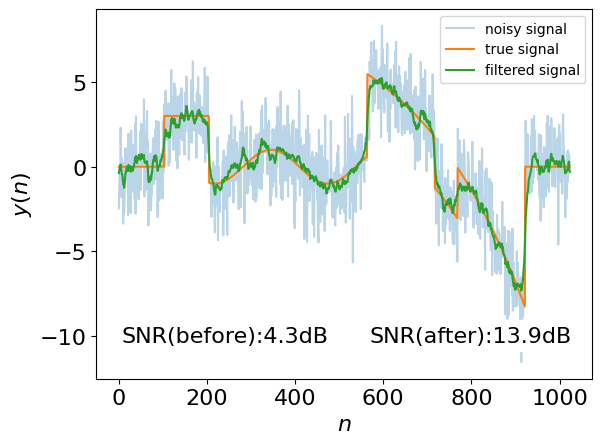

In [264]:
plt.plot(y_noisy,alpha=0.3, label="noisy signal")
plt.plot(y,label="true signal")
plt.plot(y_filtered_perfect,label="filtered signal")
plt.xlabel(r"$n$")
plt.ylabel(r"$y(n)$");
ax = plt.gca()
plt.text(0.05,0.1,f"SNR(before):{snr_before:.1f}dB",backgroundcolor="white", transform=ax.transAxes)
plt.text(0.55,0.1,f"SNR(after):{snr_after:.1f}dB",backgroundcolor="white",transform=ax.transAxes)

plt.legend(fontsize=10,loc='upper right');